Confusion Matrix:
[[946  90]
 [197 176]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409


Accuracy Score:
0.7963094393186657


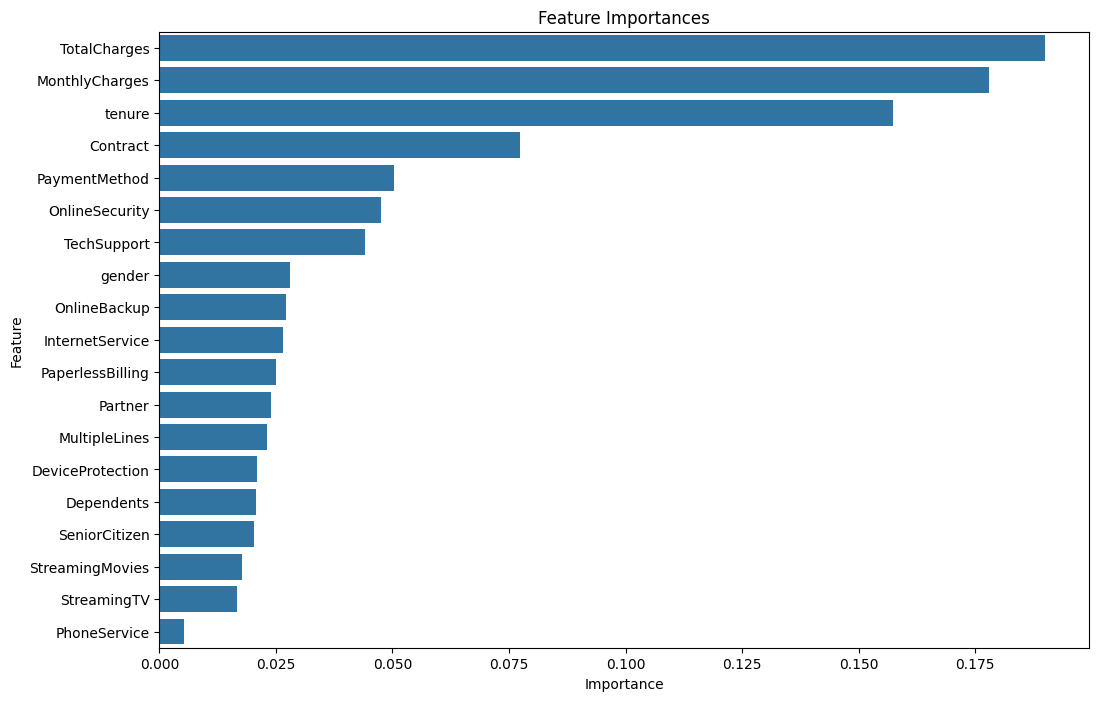

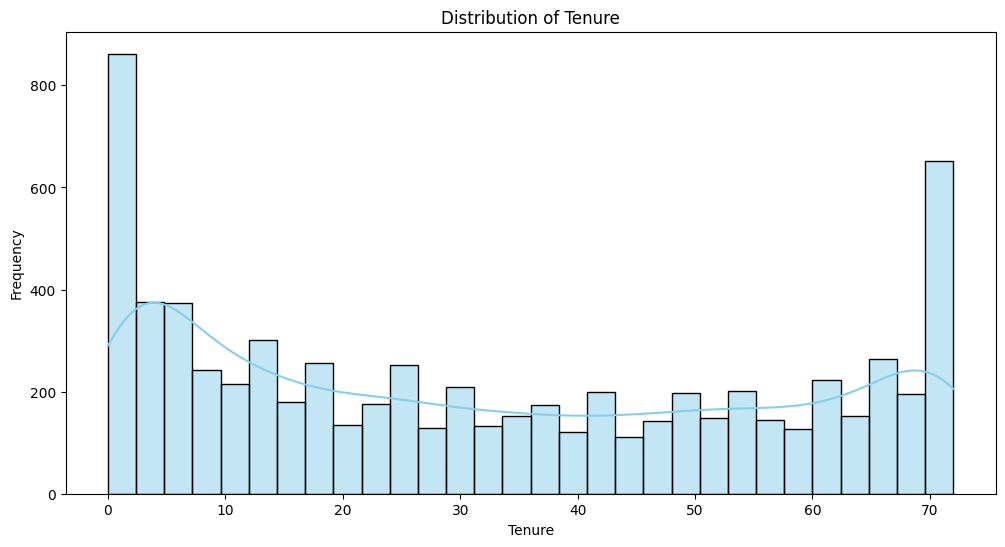

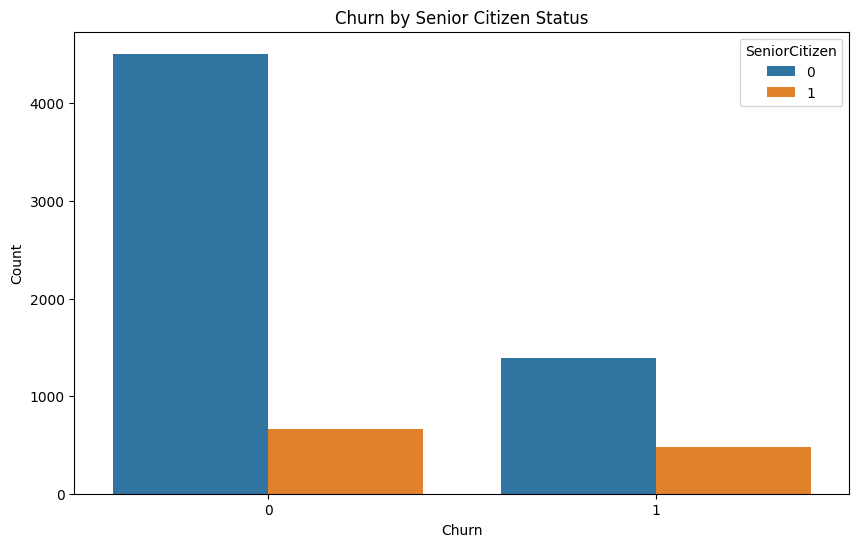

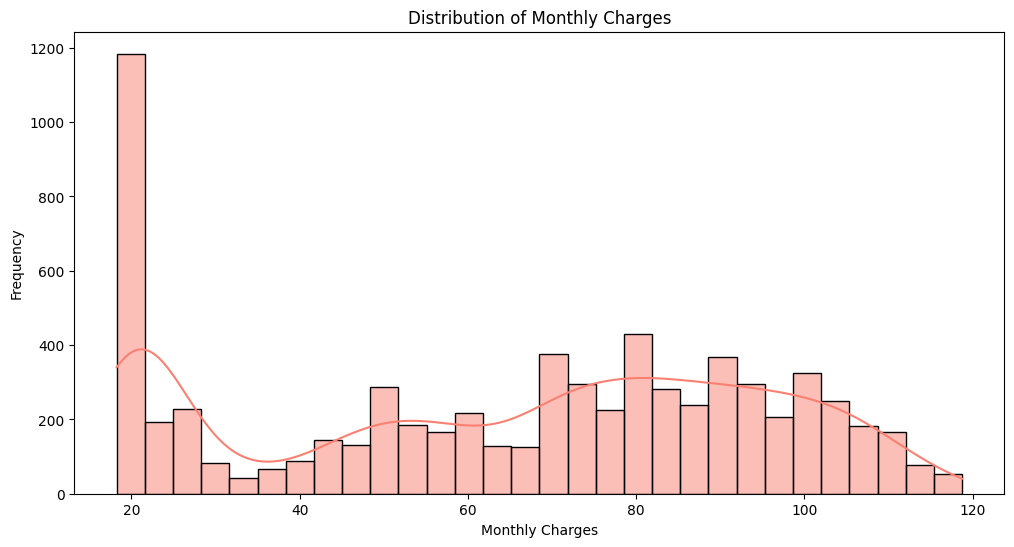

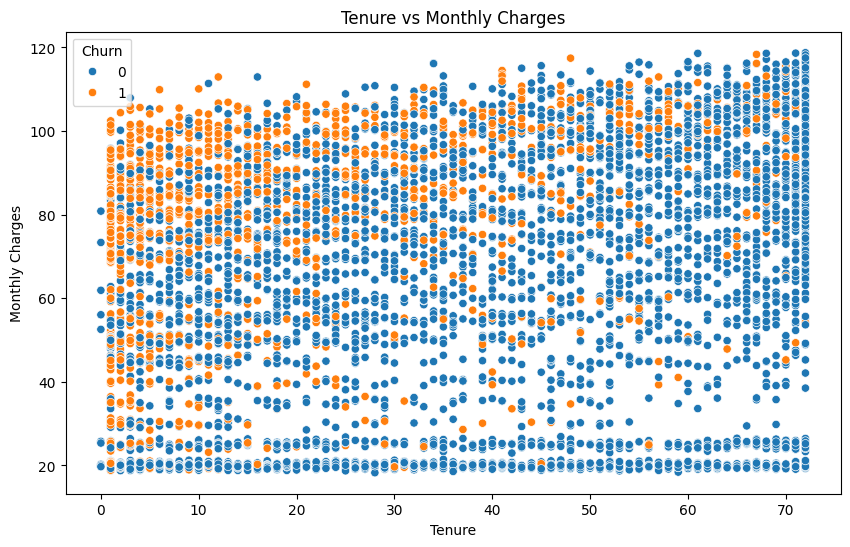

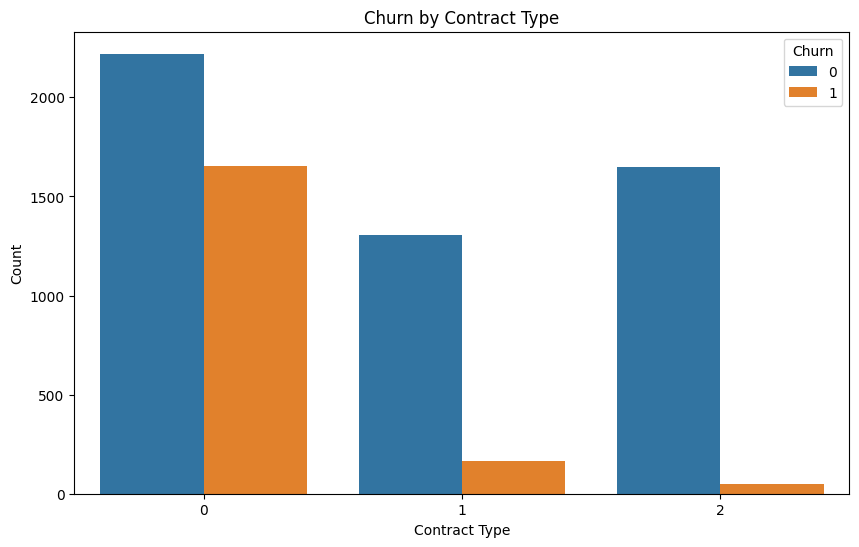

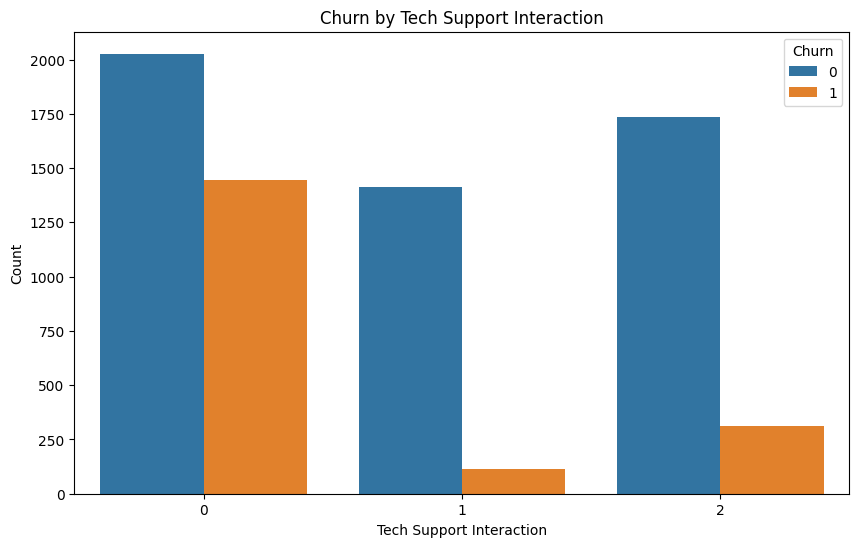

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Load the dataset
df = pd.read_csv('/Users/darcpope/Documents/churn/customer_churn.csv')

# Data Preprocessing
# Handle missing values in TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Encode categorical features
label_encoder = LabelEncoder()
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod', 'Churn']

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Split the data into features and target
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Feature Importance
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances')
plt.show()


# Customer Demographics
plt.figure(figsize=(12, 6))
sns.histplot(df['tenure'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Churn', hue='SeniorCitizen')
plt.title('Churn by Senior Citizen Status')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Usage Patterns
plt.figure(figsize=(12, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn')
plt.title('Tenure vs Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

# Subscription Details
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

# Customer Support Interactions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn by Tech Support Interaction')
plt.xlabel('Tech Support Interaction')
plt.ylabel('Count')
plt.show()